In [2]:
# THERE IS SOME ERROR, NEED TO FIX IT LATER

# Basically this is not the right dataset to use for clustering coz no pair is scattered and clustered when plotted

In [3]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# here i would take segmentation data
df_cust= pd.read_csv("Cust_Segmentation.csv")
df_cust.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


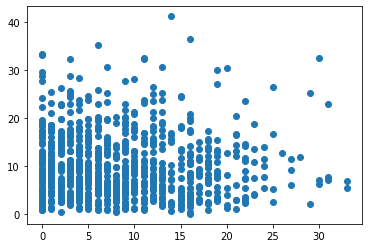

In [22]:
plt.scatter(df_cust['Years Employed'], df_cust['DebtIncomeRatio'])   
plt.show()

In [3]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [8]:
#  address feild contains categorical data, Defaulted contains null values so delete that
df_cust.drop(columns= ['Customer Id', 'Address', 'Defaulted'], axis=1, inplace=True)

In [9]:
df_cust.tail()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
845,27,1,5,26,0.548,1.220,6.8
846,28,2,7,34,0.359,2.021,7.0
847,25,4,0,18,2.802,3.210,33.4
848,32,1,12,28,0.116,0.696,2.9
849,52,1,16,64,1.866,3.638,8.6


In [10]:
df_cust.shape

(850, 7)

In [23]:
#  we will work on just 2 varaiables for simplicity and to understand well.. Income and spending score
df= df_cust.iloc[:,[2,6]].values

In [25]:
df

array([[ 6. ,  6.3],
       [26. , 12.8],
       [10. , 20.9],
       ...,
       [ 0. , 33.4],
       [12. ,  2.9],
       [16. ,  8.6]])

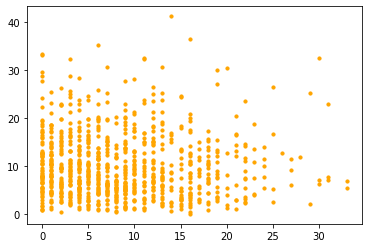

In [32]:
plt.scatter(df[:,0], df[:,1], s= 10, c= "orange")     # all rows from 0th index and all rows from 1st index. s=size of the dots, c=color
plt.show()

# through naked eyes we can see there are 5 clusters 

In [35]:
# now we will find the optimal number of clusters by elbow method. we will use K-means algorithm to perform the elbow method

from sklearn.cluster import KMeans


In [55]:
     
wcss= []                       # a variable wcss (within Sum of cluster scres)
for i in range(1,8):                 # u can run this loop for any no of times. im taking 10
  km= KMeans(n_clusters= i)
  km.fit_predict(df)
  k= km.inertia_                     # kmeans has an attribute called inertia and we take thos values and put them to wcss
  wcss.append(k)                  


C:\Users\Manjula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [56]:
wcss

[77335.91728235307,
 50571.65222049627,
 30194.761204943934,
 24472.7204991131,
 19952.03851499262,
 16708.389984796133,
 14523.187762635524]

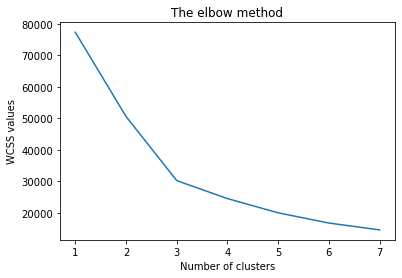

In [58]:
#  now we need to plot this wcss to find the elbow value
plt.plot(range(1,8), wcss)                                # x axis taking 1,8 range and y axis taking wcss values
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS values")
plt.show()                                     # no. of clusters may be 5 or 6 (not clearly visible)

In [75]:
# Next we will fit the KMeans to the dataset to create the clusters 

x= df
km= KMeans(n_clusters= 5)
y_pred= km.fit_predict(x)


In [76]:
y_pred

array([3, 0, 2, 3, 0, 0, 3, 3, 1, 0, 4, 4, 3, 1, 3, 3, 3, 1, 0, 0, 3, 1,
       2, 0, 2, 4, 3, 0, 4, 4, 4, 1, 3, 1, 4, 3, 3, 1, 3, 4, 3, 0, 2, 4,
       2, 1, 1, 3, 3, 4, 0, 2, 2, 0, 2, 1, 3, 3, 4, 4, 0, 0, 0, 0, 3, 4,
       4, 1, 1, 1, 4, 3, 4, 1, 4, 1, 4, 3, 0, 0, 4, 2, 0, 3, 1, 3, 1, 1,
       4, 1, 4, 3, 3, 1, 3, 3, 3, 4, 1, 3, 2, 4, 0, 3, 1, 2, 3, 1, 4, 4,
       4, 1, 4, 1, 1, 4, 1, 0, 2, 3, 1, 3, 4, 4, 4, 4, 3, 3, 1, 3, 4, 0,
       1, 3, 1, 1, 0, 1, 4, 1, 2, 3, 1, 1, 2, 1, 0, 1, 3, 3, 4, 2, 3, 1,
       4, 0, 0, 0, 1, 1, 3, 2, 4, 4, 1, 4, 3, 4, 4, 3, 0, 1, 4, 1, 4, 2,
       4, 3, 1, 0, 1, 4, 3, 0, 2, 2, 3, 4, 0, 3, 2, 2, 4, 3, 4, 1, 3, 0,
       2, 3, 0, 3, 1, 4, 4, 1, 4, 0, 0, 3, 4, 4, 4, 4, 1, 1, 1, 2, 0, 4,
       1, 0, 4, 3, 3, 3, 0, 3, 2, 0, 4, 2, 2, 1, 0, 3, 0, 1, 2, 3, 1, 4,
       3, 4, 3, 0, 4, 0, 4, 1, 4, 1, 4, 2, 4, 2, 0, 3, 3, 3, 3, 1, 1, 3,
       0, 3, 4, 0, 3, 4, 1, 4, 4, 0, 1, 3, 1, 1, 4, 3, 3, 2, 4, 1, 0, 3,
       0, 3, 0, 0, 3, 4, 3, 2, 3, 1, 1, 4, 3, 0, 4,

In [77]:
# to get unique values of labels 
np.unique(y_pred)                  # so we have 6 clusters

array([0, 1, 2, 3, 4])

In [78]:
x[y_pred == 2,1]                                           # all 2 labels of x in 1st index

array([20.9, 19.8, 17.3, 23.8, 21.3, 32.5, 24.4, 19.9, 29.7, 25.4, 30.1,
       18.2, 16.4, 25.1, 23.4, 19.2, 28.9, 26.3, 26. , 20.3, 24.5, 17.6,
       23.3, 24.6, 17. , 16.9, 23. , 23.1, 25.1, 32.5, 24.7, 18.8, 32.3,
       25.2, 19.2, 21.3, 18.9, 21.7, 28.5, 21.7, 23.8, 30.7, 20.1, 18.1,
       18.1, 23.1, 21.4, 16. , 28.2, 20. , 19. , 19.9, 26.5, 27.7, 23.8,
       16.5, 28.9, 18.5, 20.2, 17.4, 15.8, 41.3, 22.9, 26.5, 20.4, 25.6,
       23.7, 23.8, 19.8, 30.6, 24.2, 27.1, 35.3, 17. , 19.5, 33.3, 23.3,
       19.4, 19.9, 23.6, 22.7, 19.6, 18.7, 36.6, 17.3, 17.8, 20.1, 27.7,
       23.1, 17.6, 25.7, 18.4, 32.4, 23.1, 21. , 30.8, 21.3, 33.4])

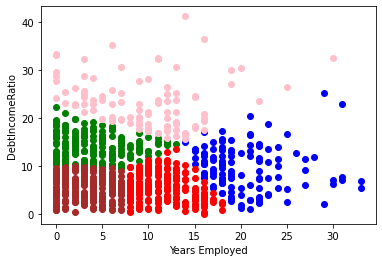

In [80]:
# lets visualize the clusters on the data points 

plt.scatter(x[y_pred == 0,0], x[y_pred == 0, 1], color= 'blue')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1, 1], color= 'green')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2, 1], color= 'pink')
plt.scatter(x[y_pred == 3,0], x[y_pred == 3, 1], color= 'brown')
plt.scatter(x[y_pred == 4,0], x[y_pred == 4, 1], color= 'red')
# plt.scatter(x[y_pred == 5,0], x[y_pred == 5, 1], color= 'yellow')

plt.xlabel('Years Employed')
plt.ylabel('DebtIncomeRatio')
plt.show()
